In [64]:
# fs_examples.ipynb
# fourier series examples
# 2021.01.07


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

# Fourier Series

* [SED: 2018: What is a Fourier Series? (Explained by drawing circles)](https://www.youtube.com/watch?v=ds0cmAV-Yek)<br>
* [Eugene Khutoryansky: 2015: Fourier Transform, Fourier Series, and frequency spectrum](https://www.youtube.com/watch?v=r18Gi8lSkfM)   $y=A\sin(\theta + \pi/3)$ <br>

  -- we can change sine wave's aplitute $A$, phase $\pi/3$, and frequency $\theta$.<br>
  -- if two sine waves have the same frequency $\theta$, their sum is another sine wave with the same frequency $\theta$, but with different amplitute and phase: $A_1\sin(\theta + \phi_1) \ + \ A_2\sin(\theta + \phi_2) = A_3\sin(\theta + \phi_3)$.<br>
  -- if we add two sime waves of different frequencies, then the resultant waveform is no longer a sine wave: $ (3/4)\sin(2\theta) + (1/4)\sin(3\theta) $ is NOT a sine wave.<br>
  -- this infinite sum $\displaystyle \sum_{n=0}^\infty \frac{4}{2n+1}\sin((2n+1)\theta) $ approximates the pulse function.<br>


* []()<br>



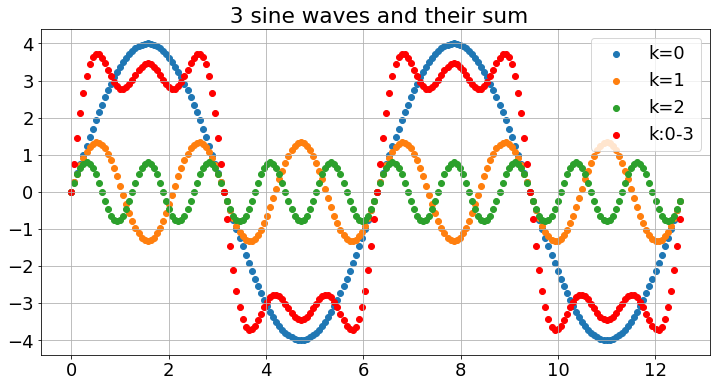

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

x = np.arange( 0, 4*np.pi, dx )
y0 = 4*np.sin(x)
y1 = 4/3*np.sin(3*x)
y2 = 4/5*np.sin(5*x)
            
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots()
# ax.plot(x, y0,'-',color='r',LineWidth=2)
ax.scatter(x, y0, label='k=0')
ax.scatter(x, y1, label='k=1')
ax.scatter(x, y2, label='k=2')

ax.scatter(x, y0+y1+y2, c='r',label='k:0-3')

ax.grid(True)   
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

ax.legend(loc='upper right')
# legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

# # Put a nicer background color on the legend.
# legend.get_frame().set_facecolor('C0')
plt.title( ' 3 sine waves and their sum')
plt.show()

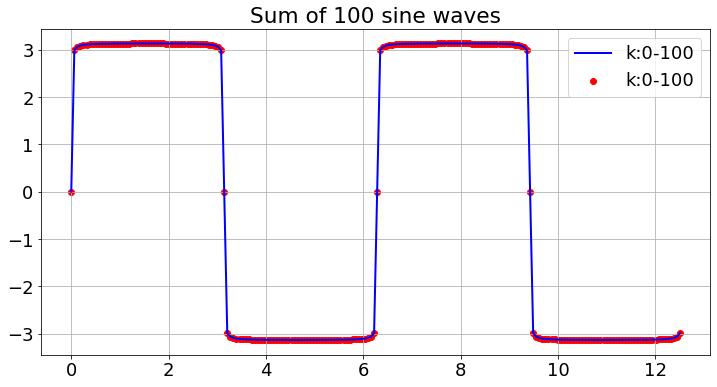

In [91]:
N=100
for k in range(N):
    y_tmp = 4/(2*k+1)*np.sin((2*k+1)*x)
    if k==0:
        y = y_tmp
    else:
        y = y + y_tmp
        
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots()
ax.plot(x, y,'-',color='b',LineWidth=2, label='k:0-100')
ax.scatter(x, y, label='k:0-100', color='r')
ax.legend(loc='upper right')
plt.title('Sum of 100 sine waves')

ax.grid(True)   
plt.show()        

#### Larson Calculus 10E
* Sec 8.2 p.523 #91 Calculate Fourier Coeffitients

${\displaystyle A_{n} =  \int_{-\pi}^{\pi}\; x\; \sin(nx) \; dx \ = 
        {\begin{cases} -\frac{2\pi}{n} \quad {\text{,  for even} \ n}\\
                        \frac{2\pi}{n} \quad {\text{,  for odd}  \ n}\end{cases}}}$
                        
Hint: use integration by parts.                        
                        
* p 532 #89 Show that $\{ \sin x, \sin 2x, \dots, \cos x, \cos 2x, \dots \}$      are orthogonal on $[-\pi,\pi]$ .  

Hint: use trig identities for products of sine and cosine.

* p. 532 #90 Let $\displaystyle f(x)=\sum_{k=1}^N B_k \sin(kx)$. 
Show that $\displaystyle B_k = \frac{1}{\pi} \int_{-\pi}^{\pi}  f(x) \sin(kx) dx$

* If $f$ is periodic on $[0,L]$, then

$$
\begin{align}
f(x) \ & = \ \frac{A_0}{2} \ + \ \sum^\infty_{k=1} A_k\cos(\frac{2\pi k x}{L}) \ + \  B_k\sin(\frac{2\pi k x}{L}) \nonumber \\
A_k \ & = \ \frac{2}{L} \int^L_0 f(x) \cos(\frac{2\pi k x}{L}) dx \nonumber \\
B_k \ & = \ \frac{2}{L} \int^L_0 f(x) \sin(\frac{2\pi k x}{L}) dx \nonumber 
\end{align}
$$


In [ ]:
# $$
# \begin{align}
# f(x) \ & = \ \frac{A_0}{2} \ + \ \sum^\infty_{k=1} A_k\cos(\frac{2\pi k x}{L}) \ + \  B_k\sin(\frac{2\pi k x}{L}) \nonumber \\
# A_k \ & = \ \frac{2}{L} \int^L_0 f(x) \cos(\frac{2\pi k x}{L}) dx \label{eq:1} \\
# B_k \ & = \ \frac{2}{L} \int^L_0 f(x) \sin(\frac{2\pi k x}{L}) dx \nonumber 
# \end{align}
# $$


In [32]:

def get_domain(x_min, x_max, N):
    dx =(x_max - x_min)/N
    return np.arange( x_min, x_max, dx ), dx
'''
def get_coef_A(k, f, x, dx):
    return np.dot(f, np.cos(k*x))*dx/np.pi

def get_coef_B(k, f, x, dx):
    return np.dot(f, np.sin(k*x))*dx/np.pi
'''
def get_coef_A(k, f, x, dx, L=2*np.pi):
    return (2/L)*np.dot(f, np.cos(k*x))*dx

def get_coef_B(k, f, x, dx, L=2*np.pi):
    return (2/L)*np.dot(f, np.sin(k*x))*dx

def get_stats(d):
    return [np.nanmin(d), np.nanmean(d), np.nanmedian(d), np.nanmax(d), np.nanstd(d)]
# get_stats([1,2,3])
# np.where(np.abs([1,2,3])> 0.9)

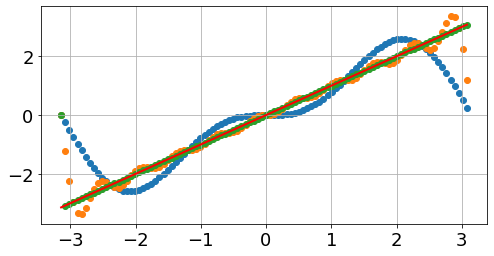

In [35]:
L = 2*np.pi
x, dx = get_domain( -np.pi, -np.pi+L, N=100)
# print(x, dx)

f = x
# np.dot(f,x)

plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots()
ax.plot(x, f,'-',color='r',LineWidth=2)
ax.grid(True)   
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

ff=0
Ncoef=50
B_list = []
for k in (np.array([i for i in range(Ncoef)])+1):
    Bk = get_coef_B(k, f, x, dx)
    B_list.append(Bk)
    ff = ff + Bk*np.sin(k*x)
    if (k in [2,10,49]):
        ax.scatter(x, ff,)

Text(0.5, 1.0, 'Coefficients')

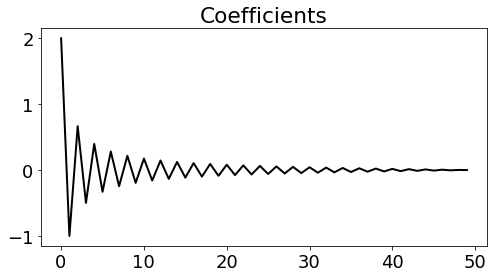

In [36]:
fig, ax = plt.subplots()
ax.plot(range(Ncoef), B_list,'-',color='k',LineWidth=2)
plt.title('Coefficients')

# Do the same for a function defined on [0,L]

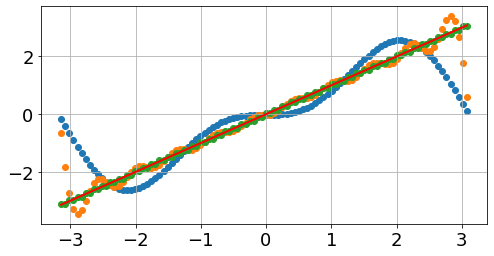

In [63]:
Npnts = 100
L = 100
L=2*np.pi
x, dx = get_domain( -L/2, L/2, N=Npnts)
# x, dx = get_domain( 0, L, N=Npnts)
# print(x, dx)

f = x
# np.dot(f,x)

plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots()
ax.plot(x, f,'-',color='r',LineWidth=2)
ax.grid(True)   
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

A0 = get_coef_A(k=0, f=f, x=x, dx=dx,L=L)
ff=A0/2
# ff=0
Ncoef=500
B_list = []
for k in (np.array([i for i in range(Ncoef)])+1):
    Ak = get_coef_A(k, f, x, dx,L=L)
    Bk = get_coef_B(k, f, x, dx,L=L)
    B_list.append(Bk)
    ff = ff + Ak*np.cos(k*x) + Bk*np.sin(k*x)
    if (k in [2,10,49]):
#     if (Ncoef-k <4):
        ax.scatter(x, ff,)

Text(0.5, 1.0, 'Coefficients')

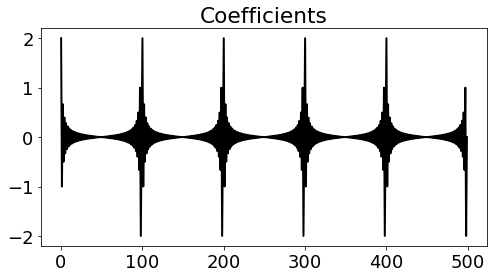

In [62]:
fig, ax = plt.subplots()
ax.plot(range(Ncoef), B_list,'-',color='k',LineWidth=2)
plt.title('Coefficients')

In [55]:
get_stats(B_list)

[-0.9999868404928227,
 0.0027725953019608683,
 9.8696368716582e-06,
 1.999993420259387,
 0.11450909636975706]

In [19]:
np.where(np.abs(B_list)> 0.9)

(array([0, 1], dtype=int64),)

In [21]:
B_list

[1.999341983076259,
 -0.9986837062728147,
 0.6646915758876197,
 -0.49736533057193694,
 0.39670470750189174,
 -0.329376108543885,
 0.28109355212602205,
 -0.24471391081338148,
 0.21626865680708643,
 -0.19337655980928278,
 0.1745221857364016,
 -0.15869514577307325,
 0.14519584556969573,
 -0.13352448449748908,
 0.12331445491906663,
 -0.11429071645175667,
 0.10624286138626242,
 -0.0990071580157511,
 0.09245426420531842,
 -0.08648062659772535,
 0.08100233688882488,
 -0.07595066335525237,
 0.07126874775108459,
 -0.0669091276486446,
 0.06283185307180311,
 -0.059003037390770244,
 0.05539372986073844,
 -0.05197902935977068,
 0.04873738106908127,
 -0.04565001337005347,
 0.04270048325374971,
 -0.0398743064598303,
 0.03715865432204365,
 -0.034542103532122045,
 0.03201442817898936,
 -0.02956642577797303,
 0.027189770788189318,
 -0.0248768904757989,
 0.022620859025914188,
 -0.02041530661385045,
 0.018254340775602822,
 -0.01613247790988563,
 0.014044583131060988,
 -0.011985816997758851,
 0.00995158788